In [73]:
import os
import gc
import ot
import pickle
import anndata
import scanpy as sc
import pandas as pd
import numpy as np
from scipy import sparse
from scipy.stats import spearmanr, pearsonr
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt

import commot as ct

In [239]:
#reading in excel file with data as csv
subclone_df = pd.read_csv("/diskmnt/Projects/Users/slivingston/subclone_data/ST_microregion_Discover_Validation_cohort_2023-Sample_level.csv")

In [242]:
#isolating spaceranger column 
subclone_df.head(3)
spaceranger = subclone_df['Spaceranger']
spaceranger

0      /diskmnt/Datasets/Spatial_Transcriptomics/outp...
1      /diskmnt/Datasets/Spatial_Transcriptomics/outp...
2      /diskmnt/Datasets/Spatial_Transcriptomics/outp...
3      /diskmnt/Datasets/Spatial_Transcriptomics/outp...
4      /diskmnt/Datasets/Spatial_Transcriptomics/outp...
                             ...                        
108    /diskmnt/Datasets/Spatial_Transcriptomics/outp...
109    /diskmnt/Datasets/Spatial_Transcriptomics/outp...
110    /diskmnt/Datasets/Spatial_Transcriptomics/outp...
111    /diskmnt/Datasets/Spatial_Transcriptomics/outp...
112    /diskmnt/Datasets/Spatial_Transcriptomics/outp...
Name: Spaceranger, Length: 113, dtype: object

In [ ]:
for i in spaceranger
    #do the stuff below

In [74]:
adata = sc.read_visium('/diskmnt/Projects/Users/estorrs/summer-researchers/data/HT397B1/spatial/spaceranger/HT397B1-S1H2Fs4U1Bp1/')
adata

AnnData object with n_obs × n_vars = 3561 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [ ]:
adata1 = sc.read_visium(/diskmnt/Datasets/Spatial_Transcriptomics/outputs_OCT/Human/HT112C1/H1/HT112C1-U1_ST_Bn1/outs)

In [75]:
adata.var_names_make_unique()
adata.raw = adata
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)

In [78]:
adata_dis500 = adata.copy()
adata_dis500

AnnData object with n_obs × n_vars = 3561 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p'
    obsm: 'spatial'

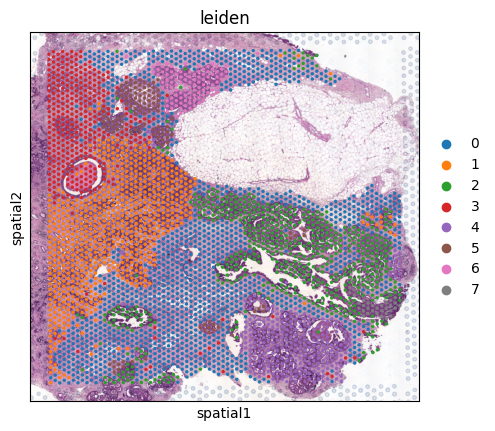

In [81]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)
adata = adata[:, adata.var.highly_variable]
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)
sc.tl.leiden(adata, resolution=0.4)
sc.pl.spatial(adata, color='leiden')

In [82]:
df_cellchat = ct.pp.ligand_receptor_database(species='human', signaling_type='Secreted Signaling', database='CellChat')
print(df_cellchat.shape)

(1199, 4)


In [79]:
adata_dis500.var

,gene_ids,feature_types,genome
SAMD11,ENSG00000187634,Gene Expression,GRCh38
NOC2L,ENSG00000188976,Gene Expression,GRCh38
KLHL17,ENSG00000187961,Gene Expression,GRCh38
PLEKHN1,ENSG00000187583,Gene Expression,GRCh38
PERM1,ENSG00000187642,Gene Expression,GRCh38
...,...,...,...
TSPY1,ENSG00000258992,Gene Expression,GRCh38
USP9Y,ENSG00000114374,Gene Expression,GRCh38
DDX3Y,ENSG00000067048,Gene Expression,GRCh38
TMSB4Y,ENSG00000154620,Gene Expression,GRCh38


In [8]:
#df_cellchat

In [83]:
df_cellchat_filtered = ct.pp.filter_lr_database(df_cellchat, adata_dis500, min_cell_pct=0.05)
print(df_cellchat_filtered.shape)

(212, 4)


In [84]:
print(df_cellchat_filtered.head())

       0              1     2                   3
0  TGFB1  TGFBR1_TGFBR2  TGFb  Secreted Signaling
1  TGFB2  TGFBR1_TGFBR2  TGFb  Secreted Signaling
2  TGFB3  TGFBR1_TGFBR2  TGFb  Secreted Signaling
3  TGFB1  ACVR1B_TGFBR2  TGFb  Secreted Signaling
4  TGFB2  ACVR1B_TGFBR2  TGFb  Secreted Signaling


In [85]:
ct.tl.spatial_communication(adata_dis500,
    database_name='cellchat', df_ligrec=df_cellchat_filtered, dis_thr=500, heteromeric=True, pathway_sum=True)

In [37]:
#adata_dis500.write("./adata.h5ad")

In [13]:
#adata_dis500 = sc.read_h5ad("./adata.h5ad")

In [86]:
adata_dis500

AnnData object with n_obs × n_vars = 3561 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial', 'log1p', 'commot-cellchat-info'
    obsm: 'spatial', 'commot-cellchat-sum-sender', 'commot-cellchat-sum-receiver'
    obsp: 'commot-cellchat-IL16-CD4', 'commot-cellchat-SEMA3B-NRP1_PLXNA4', 'commot-cellchat-SEMA3B-NRP2_PLXNA2', 'commot-cellchat-SEMA3B-NRP2_PLXNA3', 'commot-cellchat-SEMA3B-NRP2_PLXNA4', 'commot-cellchat-SEMA3B-NRP1_PLXNA1', 'commot-cellchat-SEMA3B-NRP1_PLXNA3', 'commot-cellchat-SEMA3B-NRP2_PLXNA1', 'commot-cellchat-SEMA3B-NRP1_PLXNA2', 'commot-cellchat-ANGPTL4-SDC1', 'commot-cellchat-ANGPTL4-SDC3', 'commot-cellchat-ANGPTL4-SDC4', 'commot-cellchat-ANGPTL4-SDC2', 'commot-cellchat-ANGPTL4-CDH11', 'commot-cellchat-ANGPTL4-ITGAV_ITGB3', 'commot-cellchat-ANGPTL4-ITGA5_ITGB1', 'commot-cellchat-ANGPTL4-CDH5', 'commot-cellchat-CSF1-CSF1R', 'commot-cellchat-POSTN-ITGAV_ITGB5', 'commot-cellchat-POSTN-ITGAV_ITGB3', 'comm

In [236]:
###RECIEVER PATHWAY 
adata_reciever = adata_dis500.obsm['commot-cellchat-sum-receiver']
adata_reciever

,r-IL16-CD4,r-SEMA3B-NRP1_PLXNA4,r-SEMA3B-NRP2_PLXNA2,r-SEMA3B-NRP2_PLXNA3,r-SEMA3B-NRP2_PLXNA4,r-SEMA3B-NRP1_PLXNA1,r-SEMA3B-NRP1_PLXNA3,r-SEMA3B-NRP2_PLXNA1,r-SEMA3B-NRP1_PLXNA2,r-ANGPTL4-SDC1,...,r-SEMA3,r-SPP1,r-TGFb,r-TRAIL,r-TWEAK,r-VEGF,r-VISFATIN,r-WNT,r-ncWNT,clone
AAACAAGTATCTCCCA-1,0.762666,0.0,0.0,0.406945,0.0,0.000000,0.000000,0.0,0.000000,0.279588,...,2.119533,1.429122,1.143999,0.000000,0.000000,1.143999,0.000000,0.0,0.380865,NaN
AAACACCAATAACTGC-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.010364,...,0.332633,2.389116,0.000000,0.278353,0.000000,0.000000,0.269974,0.0,0.000000,Clone_4
AAACAGAGCGACTCCT-1,0.000000,0.0,0.0,0.000000,0.0,0.070448,0.181078,0.0,0.000000,0.011718,...,1.174453,0.570094,0.000000,0.401888,0.000000,0.220999,0.218867,0.0,0.441578,Clone_29
AAACAGCTTTCAGAAG-1,0.001484,0.0,0.0,0.000000,0.0,0.320790,0.320811,0.0,0.179689,0.002676,...,1.866870,0.207971,0.854273,0.000000,0.271075,0.392023,0.269738,0.0,0.138999,Clone_2
AAACAGGGTCTATATT-1,0.371176,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000013,...,0.000000,0.002765,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Clone_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCTAGATACGCT-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.089967,...,0.000000,0.022761,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
TTGTTGGCAATGACTG-1,0.078355,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000015,...,0.000000,0.010052,1.068081,0.000000,0.000000,0.000000,0.180621,0.0,0.000000,NaN
TTGTTTCACATCCAGG-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.010010,...,1.275883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Clone_45
TTGTTTCATTAGTCTA-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.726244,0.0,0.083685,NaN


In [238]:
##sender pathway - ranked with no processing
adata_sender = adata_dis500.obsm['commot-cellchat-sum-sender']
adata_sender
sender_adata_combined_all = adata_sender.sum(0)
#sender_adata_combined_all = pd.DataFrame(sender_adata_combined_all).sort_values(0)
#sender_adata_combined_all

In [128]:
#I think got the sums of each pathway for each barcode
adata_combined_all = adata_dis500.obsm['commot-cellchat-sum-receiver'].sum(0)

r-IL16-CD4               250.210187
r-SEMA3B-NRP1_PLXNA4      45.230934
r-SEMA3B-NRP2_PLXNA2      21.639864
r-SEMA3B-NRP2_PLXNA3      54.090846
r-SEMA3B-NRP2_PLXNA4      11.970643
                           ...     
r-TWEAK                  154.273042
r-VEGF                   671.975937
r-VISFATIN              1073.347587
r-WNT                    495.223679
r-ncWNT                  782.172486
Length: 258, dtype: float64

In [158]:
#ranked the pathways from low the high 
adata_combined_all = pd.DataFrame(adata_combined_all).sort_values(0)
adata_combined_all

,0
r-WNT4-FZD2_LRP5,7.428092
r-WNT4-FZD2_LRP6,7.448648
r-FGF2-FGFR3,9.043614
r-WNT2-FZD2_LRP5,9.096706
r-BMP8A-BMPR1B_ACVR2A,9.315612
...,...
r-MK,2535.250658
r-SEMA3,3086.143197
r-MIF-CD74_CD44,4119.381260
r-MIF,5177.317875


In [90]:
clone_list = pd.read_csv('/diskmnt/Projects/Users/slivingston/revised_annotations/HT397B1-S1H2U1.csv')
clone_list
#repeat for all only clones
#repeat for each clone individually

,Barcode,Manual_Tumor_CloneV2
0,AAACAAGTATCTCCCA-1,NaN
1,AAACACCAATAACTGC-1,Clone_4
2,AAACAGAGCGACTCCT-1,Clone_29
3,AAACAGCTTTCAGAAG-1,Clone_2
4,AAACAGGGTCTATATT-1,Clone_2
...,...,...
3556,TTGTTCTAGATACGCT-1,NaN
3557,TTGTTGGCAATGACTG-1,NaN
3558,TTGTTTCACATCCAGG-1,Clone_45
3559,TTGTTTCATTAGTCTA-1,NaN


In [126]:
#Added column with clone identification 
df = adata_dis500.obsm['commot-cellchat-sum-receiver']
df.insert(258, 'clone', clone_list['Manual_Tumor_CloneV2'])
df

,r-IL16-CD4,r-SEMA3B-NRP1_PLXNA4,r-SEMA3B-NRP2_PLXNA2,r-SEMA3B-NRP2_PLXNA3,r-SEMA3B-NRP2_PLXNA4,r-SEMA3B-NRP1_PLXNA1,r-SEMA3B-NRP1_PLXNA3,r-SEMA3B-NRP2_PLXNA1,r-SEMA3B-NRP1_PLXNA2,r-ANGPTL4-SDC1,...,r-SEMA3,r-SPP1,r-TGFb,r-TRAIL,r-TWEAK,r-VEGF,r-VISFATIN,r-WNT,r-ncWNT,clone
AAACAAGTATCTCCCA-1,0.762666,0.0,0.0,0.406945,0.0,0.000000,0.000000,0.0,0.000000,0.279588,...,2.119533,1.429122,1.143999,0.000000,0.000000,1.143999,0.000000,0.0,0.380865,NaN
AAACACCAATAACTGC-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.010364,...,0.332633,2.389116,0.000000,0.278353,0.000000,0.000000,0.269974,0.0,0.000000,Clone_4
AAACAGAGCGACTCCT-1,0.000000,0.0,0.0,0.000000,0.0,0.070448,0.181078,0.0,0.000000,0.011718,...,1.174453,0.570094,0.000000,0.401888,0.000000,0.220999,0.218867,0.0,0.441578,Clone_29
AAACAGCTTTCAGAAG-1,0.001484,0.0,0.0,0.000000,0.0,0.320790,0.320811,0.0,0.179689,0.002676,...,1.866870,0.207971,0.854273,0.000000,0.271075,0.392023,0.269738,0.0,0.138999,Clone_2
AAACAGGGTCTATATT-1,0.371176,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000013,...,0.000000,0.002765,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Clone_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCTAGATACGCT-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.089967,...,0.000000,0.022761,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
TTGTTGGCAATGACTG-1,0.078355,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000015,...,0.000000,0.010052,1.068081,0.000000,0.000000,0.000000,0.180621,0.0,0.000000,NaN
TTGTTTCACATCCAGG-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.010010,...,1.275883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Clone_45
TTGTTTCATTAGTCTA-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.726244,0.0,0.083685,NaN


In [ ]:
#sender adding clones line
sender = adata_dis500.obsm['commot-cellchat-sum-sender']
#sender.insert(258, 'clone', clone_list['Manual_Tumor_CloneV2'])
#sender

In [132]:
test = df
test

,r-IL16-CD4,r-SEMA3B-NRP1_PLXNA4,r-SEMA3B-NRP2_PLXNA2,r-SEMA3B-NRP2_PLXNA3,r-SEMA3B-NRP2_PLXNA4,r-SEMA3B-NRP1_PLXNA1,r-SEMA3B-NRP1_PLXNA3,r-SEMA3B-NRP2_PLXNA1,r-SEMA3B-NRP1_PLXNA2,r-ANGPTL4-SDC1,...,r-SEMA3,r-SPP1,r-TGFb,r-TRAIL,r-TWEAK,r-VEGF,r-VISFATIN,r-WNT,r-ncWNT,clone
AAACAAGTATCTCCCA-1,0.762666,0.0,0.0,0.406945,0.0,0.000000,0.000000,0.0,0.000000,0.279588,...,2.119533,1.429122,1.143999,0.000000,0.000000,1.143999,0.000000,0.0,0.380865,NaN
AAACACCAATAACTGC-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.010364,...,0.332633,2.389116,0.000000,0.278353,0.000000,0.000000,0.269974,0.0,0.000000,Clone_4
AAACAGAGCGACTCCT-1,0.000000,0.0,0.0,0.000000,0.0,0.070448,0.181078,0.0,0.000000,0.011718,...,1.174453,0.570094,0.000000,0.401888,0.000000,0.220999,0.218867,0.0,0.441578,Clone_29
AAACAGCTTTCAGAAG-1,0.001484,0.0,0.0,0.000000,0.0,0.320790,0.320811,0.0,0.179689,0.002676,...,1.866870,0.207971,0.854273,0.000000,0.271075,0.392023,0.269738,0.0,0.138999,Clone_2
AAACAGGGTCTATATT-1,0.371176,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000013,...,0.000000,0.002765,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Clone_2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTCTAGATACGCT-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.089967,...,0.000000,0.022761,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,NaN
TTGTTGGCAATGACTG-1,0.078355,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000015,...,0.000000,0.010052,1.068081,0.000000,0.000000,0.000000,0.180621,0.0,0.000000,NaN
TTGTTTCACATCCAGG-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.010010,...,1.275883,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,Clone_45
TTGTTTCATTAGTCTA-1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.726244,0.0,0.083685,NaN


In [166]:
#dropping NaN's
adata_just_clones = df.dropna(axis = 0, how = 'any')
adata_just_clones

,r-IL16-CD4,r-SEMA3B-NRP1_PLXNA4,r-SEMA3B-NRP2_PLXNA2,r-SEMA3B-NRP2_PLXNA3,r-SEMA3B-NRP2_PLXNA4,r-SEMA3B-NRP1_PLXNA1,r-SEMA3B-NRP1_PLXNA3,r-SEMA3B-NRP2_PLXNA1,r-SEMA3B-NRP1_PLXNA2,r-ANGPTL4-SDC1,...,r-SEMA3,r-SPP1,r-TGFb,r-TRAIL,r-TWEAK,r-VEGF,r-VISFATIN,r-WNT,r-ncWNT,clone
AAACACCAATAACTGC-1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.010364,...,0.332633,2.389116,0.000000,0.278353,0.000000,0.000000,0.269974,0.000000,0.000000,Clone_4
AAACAGAGCGACTCCT-1,0.000000,0.0,0.0,0.0,0.0,0.070448,0.181078,0.0,0.000000,0.011718,...,1.174453,0.570094,0.000000,0.401888,0.000000,0.220999,0.218867,0.000000,0.441578,Clone_29
AAACAGCTTTCAGAAG-1,0.001484,0.0,0.0,0.0,0.0,0.320790,0.320811,0.0,0.179689,0.002676,...,1.866870,0.207971,0.854273,0.000000,0.271075,0.392023,0.269738,0.000000,0.138999,Clone_2
AAACAGGGTCTATATT-1,0.371176,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000013,...,0.000000,0.002765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Clone_2
AAACCGGAAATGTTAA-1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.012566,0.000000,0.000000,0.000000,1.077781,0.008797,0.000000,0.000000,Clone_14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGGTATAGGTATG-1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.210670,...,0.998139,2.912405,1.267196,0.000000,0.000000,0.000000,0.005362,0.000000,0.109755,Clone_23
TTGTGTATGCCACCAA-1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.097134,0.000000,0.000000,0.000000,0.000000,0.803885,2.020660,0.915145,Clone_45
TTGTGTTTCCCGAAAG-1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.231375,0.000000,0.000000,Clone_45
TTGTTCAGTGTGCTAC-1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000515,...,0.345680,1.246641,0.000000,0.000000,0.000000,0.000000,0.494786,0.040808,0.476617,Clone_38


In [171]:
adata_just_clones_tester = adata_just_clones
adata_just_clones_tester

,r-IL16-CD4,r-SEMA3B-NRP1_PLXNA4,r-SEMA3B-NRP2_PLXNA2,r-SEMA3B-NRP2_PLXNA3,r-SEMA3B-NRP2_PLXNA4,r-SEMA3B-NRP1_PLXNA1,r-SEMA3B-NRP1_PLXNA3,r-SEMA3B-NRP2_PLXNA1,r-SEMA3B-NRP1_PLXNA2,r-ANGPTL4-SDC1,...,r-SEMA3,r-SPP1,r-TGFb,r-TRAIL,r-TWEAK,r-VEGF,r-VISFATIN,r-WNT,r-ncWNT,clone
AAACACCAATAACTGC-1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.010364,...,0.332633,2.389116,0.000000,0.278353,0.000000,0.000000,0.269974,0.000000,0.000000,Clone_4
AAACAGAGCGACTCCT-1,0.000000,0.0,0.0,0.0,0.0,0.070448,0.181078,0.0,0.000000,0.011718,...,1.174453,0.570094,0.000000,0.401888,0.000000,0.220999,0.218867,0.000000,0.441578,Clone_29
AAACAGCTTTCAGAAG-1,0.001484,0.0,0.0,0.0,0.0,0.320790,0.320811,0.0,0.179689,0.002676,...,1.866870,0.207971,0.854273,0.000000,0.271075,0.392023,0.269738,0.000000,0.138999,Clone_2
AAACAGGGTCTATATT-1,0.371176,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000013,...,0.000000,0.002765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,Clone_2
AAACCGGAAATGTTAA-1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.012566,0.000000,0.000000,0.000000,1.077781,0.008797,0.000000,0.000000,Clone_14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTGGTATAGGTATG-1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.210670,...,0.998139,2.912405,1.267196,0.000000,0.000000,0.000000,0.005362,0.000000,0.109755,Clone_23
TTGTGTATGCCACCAA-1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.097134,0.000000,0.000000,0.000000,0.000000,0.803885,2.020660,0.915145,Clone_45
TTGTGTTTCCCGAAAG-1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.231375,0.000000,0.000000,Clone_45
TTGTTCAGTGTGCTAC-1,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000515,...,0.345680,1.246641,0.000000,0.000000,0.000000,0.000000,0.494786,0.040808,0.476617,Clone_38


In [212]:
tester2 = adata_just_clones.groupby('clone').sum().reset_index()
tester2

,clone,r-IL16-CD4,r-SEMA3B-NRP1_PLXNA4,r-SEMA3B-NRP2_PLXNA2,r-SEMA3B-NRP2_PLXNA3,r-SEMA3B-NRP2_PLXNA4,r-SEMA3B-NRP1_PLXNA1,r-SEMA3B-NRP1_PLXNA3,r-SEMA3B-NRP2_PLXNA1,r-SEMA3B-NRP1_PLXNA2,...,r-PTN,r-SEMA3,r-SPP1,r-TGFb,r-TRAIL,r-TWEAK,r-VEGF,r-VISFATIN,r-WNT,r-ncWNT
0,Clone_1,0.656679,0.000000,0.104986,0.104986,0.000000,1.543231,0.949587,0.424427,0.232255,...,0.476142,12.373885,11.206478,4.093422,1.642030,2.441339,1.881524,7.017820,0.000000,0.893543
1,Clone_10,1.378388,0.737704,0.000000,0.442240,0.095684,2.668208,3.019353,0.360640,0.189820,...,11.396957,25.768981,12.596310,4.950167,4.470368,2.542239,2.185416,11.673251,6.128866,9.742084
2,Clone_11,0.958065,0.000000,0.000000,0.000000,0.000000,1.020068,0.344026,0.000000,0.000000,...,0.351664,4.862030,5.459366,0.743731,0.245984,0.245984,0.752062,3.152761,0.000000,0.269509
3,Clone_12,0.581512,0.216672,0.309531,0.446827,0.166892,0.360865,0.556504,0.350510,0.461154,...,0.000000,16.209192,14.066531,6.846332,1.930970,0.144642,2.125847,4.647874,1.005228,5.215414
4,Clone_13,0.000000,0.000000,0.000000,0.000000,0.000000,0.139944,0.139945,0.000000,0.139945,...,0.000000,1.060296,1.798598,1.059842,0.454010,0.000000,2.088301,0.328711,0.772485,2.346165
5,Clone_14,0.679011,0.000000,0.000000,0.142663,0.000000,0.662741,0.899893,0.142663,0.000000,...,1.098527,6.955312,7.107086,4.303993,0.867261,0.353046,5.622564,2.207141,0.000000,0.884600
6,Clone_15,0.178257,0.833821,0.000000,0.000000,0.000000,1.030432,0.791624,0.000000,0.753878,...,0.933099,9.476799,5.481289,2.436457,1.947397,0.000000,2.229508,4.069936,1.944428,0.108342
7,Clone_16,1.164969,0.455217,0.000000,1.449789,0.383627,1.517782,1.959545,0.869086,0.231614,...,3.708459,22.946180,40.898094,3.603071,1.110413,0.979632,2.249394,7.393372,8.133217,9.569357
8,Clone_17,0.161472,0.607012,0.169543,0.264026,0.264022,1.248040,1.068060,0.264022,0.334887,...,4.976763,11.911952,9.727781,1.584549,0.487107,0.241280,0.836155,1.312882,4.629630,3.255880
9,Clone_18,0.222638,0.000000,0.235536,0.410843,0.000000,2.090043,1.670595,0.410987,0.857695,...,7.200374,19.259833,19.913868,0.394159,1.581765,1.816159,0.868581,3.678061,3.637942,5.379606


In [213]:
sorted_tester = tester2.sort_values(by='clone')
sorted_tester

,clone,r-IL16-CD4,r-SEMA3B-NRP1_PLXNA4,r-SEMA3B-NRP2_PLXNA2,r-SEMA3B-NRP2_PLXNA3,r-SEMA3B-NRP2_PLXNA4,r-SEMA3B-NRP1_PLXNA1,r-SEMA3B-NRP1_PLXNA3,r-SEMA3B-NRP2_PLXNA1,r-SEMA3B-NRP1_PLXNA2,...,r-PTN,r-SEMA3,r-SPP1,r-TGFb,r-TRAIL,r-TWEAK,r-VEGF,r-VISFATIN,r-WNT,r-ncWNT
0,Clone_1,0.656679,0.000000,0.104986,0.104986,0.000000,1.543231,0.949587,0.424427,0.232255,...,0.476142,12.373885,11.206478,4.093422,1.642030,2.441339,1.881524,7.017820,0.000000,0.893543
1,Clone_10,1.378388,0.737704,0.000000,0.442240,0.095684,2.668208,3.019353,0.360640,0.189820,...,11.396957,25.768981,12.596310,4.950167,4.470368,2.542239,2.185416,11.673251,6.128866,9.742084
2,Clone_11,0.958065,0.000000,0.000000,0.000000,0.000000,1.020068,0.344026,0.000000,0.000000,...,0.351664,4.862030,5.459366,0.743731,0.245984,0.245984,0.752062,3.152761,0.000000,0.269509
3,Clone_12,0.581512,0.216672,0.309531,0.446827,0.166892,0.360865,0.556504,0.350510,0.461154,...,0.000000,16.209192,14.066531,6.846332,1.930970,0.144642,2.125847,4.647874,1.005228,5.215414
4,Clone_13,0.000000,0.000000,0.000000,0.000000,0.000000,0.139944,0.139945,0.000000,0.139945,...,0.000000,1.060296,1.798598,1.059842,0.454010,0.000000,2.088301,0.328711,0.772485,2.346165
5,Clone_14,0.679011,0.000000,0.000000,0.142663,0.000000,0.662741,0.899893,0.142663,0.000000,...,1.098527,6.955312,7.107086,4.303993,0.867261,0.353046,5.622564,2.207141,0.000000,0.884600
6,Clone_15,0.178257,0.833821,0.000000,0.000000,0.000000,1.030432,0.791624,0.000000,0.753878,...,0.933099,9.476799,5.481289,2.436457,1.947397,0.000000,2.229508,4.069936,1.944428,0.108342
7,Clone_16,1.164969,0.455217,0.000000,1.449789,0.383627,1.517782,1.959545,0.869086,0.231614,...,3.708459,22.946180,40.898094,3.603071,1.110413,0.979632,2.249394,7.393372,8.133217,9.569357
8,Clone_17,0.161472,0.607012,0.169543,0.264026,0.264022,1.248040,1.068060,0.264022,0.334887,...,4.976763,11.911952,9.727781,1.584549,0.487107,0.241280,0.836155,1.312882,4.629630,3.255880
9,Clone_18,0.222638,0.000000,0.235536,0.410843,0.000000,2.090043,1.670595,0.410987,0.857695,...,7.200374,19.259833,19.913868,0.394159,1.581765,1.816159,0.868581,3.678061,3.637942,5.379606


In [210]:
tester = adata_just_clones.groupby('clone')
tester.head()
tester_sum = tester.sum(0)
tester_sum
#tester_sorted = tester_sum.sort_values(0)

,r-IL16-CD4,r-SEMA3B-NRP1_PLXNA4,r-SEMA3B-NRP2_PLXNA2,r-SEMA3B-NRP2_PLXNA3,r-SEMA3B-NRP2_PLXNA4,r-SEMA3B-NRP1_PLXNA1,r-SEMA3B-NRP1_PLXNA3,r-SEMA3B-NRP2_PLXNA1,r-SEMA3B-NRP1_PLXNA2,r-ANGPTL4-SDC1,...,r-PTN,r-SEMA3,r-SPP1,r-TGFb,r-TRAIL,r-TWEAK,r-VEGF,r-VISFATIN,r-WNT,r-ncWNT
clone,,,,,,,,,,,,,,,,,,,,,
Clone_1,0.656679,0.000000,0.104986,0.104986,0.000000,1.543231,0.949587,0.424427,0.232255,1.532665,...,0.476142,12.373885,11.206478,4.093422,1.642030,2.441339,1.881524,7.017820,0.000000,0.893543
Clone_10,1.378388,0.737704,0.000000,0.442240,0.095684,2.668208,3.019353,0.360640,0.189820,1.034356,...,11.396957,25.768981,12.596310,4.950167,4.470368,2.542239,2.185416,11.673251,6.128866,9.742084
Clone_11,0.958065,0.000000,0.000000,0.000000,0.000000,1.020068,0.344026,0.000000,0.000000,0.319397,...,0.351664,4.862030,5.459366,0.743731,0.245984,0.245984,0.752062,3.152761,0.000000,0.269509
Clone_12,0.581512,0.216672,0.309531,0.446827,0.166892,0.360865,0.556504,0.350510,0.461154,0.544485,...,0.000000,16.209192,14.066531,6.846332,1.930970,0.144642,2.125847,4.647874,1.005228,5.215414
Clone_13,0.000000,0.000000,0.000000,0.000000,0.000000,0.139944,0.139945,0.000000,0.139945,0.000000,...,0.000000,1.060296,1.798598,1.059842,0.454010,0.000000,2.088301,0.328711,0.772485,2.346165
Clone_14,0.679011,0.000000,0.000000,0.142663,0.000000,0.662741,0.899893,0.142663,0.000000,0.020037,...,1.098527,6.955312,7.107086,4.303993,0.867261,0.353046,5.622564,2.207141,0.000000,0.884600
Clone_15,0.178257,0.833821,0.000000,0.000000,0.000000,1.030432,0.791624,0.000000,0.753878,0.656310,...,0.933099,9.476799,5.481289,2.436457,1.947397,0.000000,2.229508,4.069936,1.944428,0.108342
Clone_16,1.164969,0.455217,0.000000,1.449789,0.383627,1.517782,1.959545,0.869086,0.231614,0.630538,...,3.708459,22.946180,40.898094,3.603071,1.110413,0.979632,2.249394,7.393372,8.133217,9.569357
Clone_17,0.161472,0.607012,0.169543,0.264026,0.264022,1.248040,1.068060,0.264022,0.334887,0.169012,...,4.976763,11.911952,9.727781,1.584549,0.487107,0.241280,0.836155,1.312882,4.629630,3.255880


In [201]:
tester_sum.tester_sum.sum(0)

AttributeError: 'DataFrame' object has no attribute 'tester_sum'

In [185]:
#test...
tester = clone_list
check = clone_list.groupby('Manual_Tumor_CloneV2')
check
check.first()
check.get_group('Clone_14')

,Barcode,Manual_Tumor_CloneV2
AAACCGGAAATGTTAA-1,AAACCGGAAATGTTAA-1,Clone_14
AACTGAGTTATACTGA-1,AACTGAGTTATACTGA-1,Clone_14
AGACAGGCATCTCAGC-1,AGACAGGCATCTCAGC-1,Clone_14
ATTGTTCAACGATCCG-1,ATTGTTCAACGATCCG-1,Clone_14
GGCGGGCTCTAAGAGT-1,GGCGGGCTCTAAGAGT-1,Clone_14
GTGGTGATGGTTTGTG-1,GTGGTGATGGTTTGTG-1,Clone_14
TAATCAACCAAATGGG-1,TAATCAACCAAATGGG-1,Clone_14
TCTGCTTAGAACAAGC-1,TCTGCTTAGAACAAGC-1,Clone_14
TGTGGACTATCTACGT-1,TGTGGACTATCTACGT-1,Clone_14
TGTGGTAGGGTGCCTT-1,TGTGGTAGGGTGCCTT-1,Clone_14


In [167]:
adata_just_clones_sum = adata_just_clones.sum(0)
adata_just_clones_sum

r-IL16-CD4                                                      60.901514
r-SEMA3B-NRP1_PLXNA4                                            23.664415
r-SEMA3B-NRP2_PLXNA2                                            12.076621
r-SEMA3B-NRP2_PLXNA3                                            28.427866
r-SEMA3B-NRP2_PLXNA4                                             5.699976
                                              ...                        
r-VEGF                                                         214.159069
r-VISFATIN                                                     582.130863
r-WNT                                                          305.371828
r-ncWNT                                                        411.192489
clone                   Clone_4Clone_29Clone_2Clone_2Clone_14Clone_45C...
Length: 259, dtype: object

In [168]:
del adata_just_clones_sum['clone']
adata_just_clones_sum

r-IL16-CD4               60.901514
r-SEMA3B-NRP1_PLXNA4     23.664415
r-SEMA3B-NRP2_PLXNA2     12.076621
r-SEMA3B-NRP2_PLXNA3     28.427866
r-SEMA3B-NRP2_PLXNA4      5.699976
                           ...    
r-TWEAK                  89.930956
r-VEGF                  214.159069
r-VISFATIN              582.130863
r-WNT                   305.371828
r-ncWNT                 411.192489
Length: 258, dtype: object

In [169]:
adata_just_clones_sorted = pd.DataFrame(adata_just_clones_sum).sort_values(0)
adata_just_clones_sorted

,0
r-WNT2-FZD2_LRP6,3.809063
r-WNT2-FZD2_LRP5,3.994209
r-BMP8A-BMPR1B_ACVR2A,4.249147
r-WNT4-FZD2_LRP5,5.007399
r-FGF2-FGFR3,5.295924
...,...
r-SPP1,1242.975743
r-SEMA3,1490.702898
r-MIF-CD74_CD44,1659.649055
r-MIF,1969.816362


In [ ]:
#part 3



In [ ]:
#results

In [160]:
adata_combined_all

,0
r-WNT4-FZD2_LRP5,7.428092
r-WNT4-FZD2_LRP6,7.448648
r-FGF2-FGFR3,9.043614
r-WNT2-FZD2_LRP5,9.096706
r-BMP8A-BMPR1B_ACVR2A,9.315612
...,...
r-MK,2535.250658
r-SEMA3,3086.143197
r-MIF-CD74_CD44,4119.381260
r-MIF,5177.317875


In [162]:
adata_just_clones_sorted

,0
r-WNT2-FZD2_LRP6,3.809063
r-WNT2-FZD2_LRP5,3.994209
r-BMP8A-BMPR1B_ACVR2A,4.249147
r-WNT4-FZD2_LRP5,5.007399
r-FGF2-FGFR3,5.295924
...,...
r-SPP1,1242.975743
r-SEMA3,1490.702898
r-MIF-CD74_CD44,1659.649055
r-MIF,1969.816362


In [163]:
adata_just_clones_sorted.tail(20)

,0
r-BMP,372.173944
r-ANGPTL,374.300565
r-SEMA3C-PLXND1,396.914133
r-GRN-SORT1,397.868209
r-GRN,397.868209
r-ncWNT,411.192489
r-POSTN-ITGAV_ITGB5,459.748024
r-CXCL,466.721902
r-NAMPT-INSR,500.014982
r-PERIOSTIN,516.791763


In [164]:
adata_combined_all.tail(20)

,0
r-ncWNT,782.172486
r-EGF,842.643134
r-NAMPT-INSR,882.113588
r-MIF-CD74_CXCR4,929.817586
r-POSTN-ITGAV_ITGB5,956.310863
r-SEMA3C-PLXND1,980.546294
r-CXCL12-CXCR4,996.317240
r-SPP1-CD44,1047.569569
r-VISFATIN,1073.347587
r-PERIOSTIN,1082.827602


<Axes: >

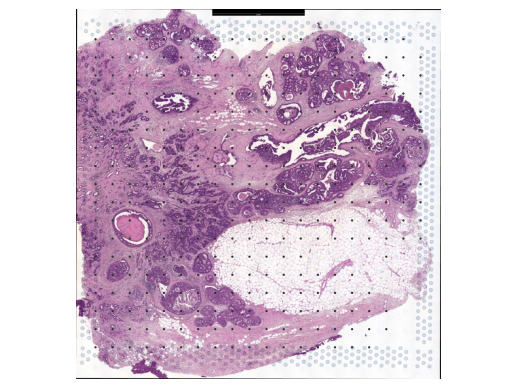

In [17]:
#doing the function with ACTIVIN pathway rather than PSAP bc this one doesn't have PSAP
ct.tl.communication_direction(adata_dis500, database_name='cellchat', pathway_name='ACTIVIN', k=5)
ct.pl.plot_cell_communication(adata_dis500, database_name='cellchat', pathway_name='ACTIVIN', plot_method='grid', background_legend=True,
    scale=0.00003, ndsize=8, grid_density=0.4, summary='sender', background='image', clustering='leiden', cmap='Alphabet',
    normalize_v = True, normalize_v_quantile=0.995)

In [18]:
adata_dis500.obs['leiden'] = adata.obs['leiden']

In [19]:
ct.tl.cluster_communication(adata_dis500, database_name='cellchat', pathway_name='ACTIVIN', clustering='leiden',
    n_permutations=100)

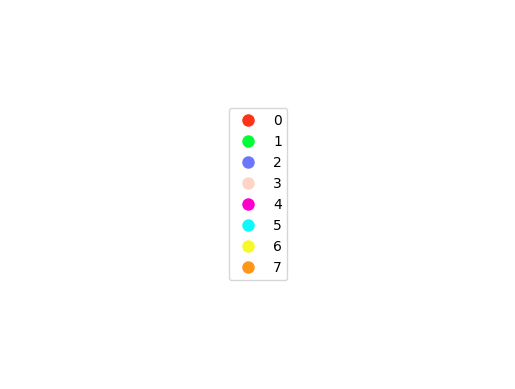

In [20]:
ct.pl.plot_cluster_communication_network(adata_dis500, uns_names=['commot_cluster-leiden-cellchat-ACTIVIN'],
    nx_node_pos=None, nx_bg_pos=False, p_value_cutoff = 5e-2, filename='ACTIVIN_cluster.pdf', nx_node_cmap='Light24')

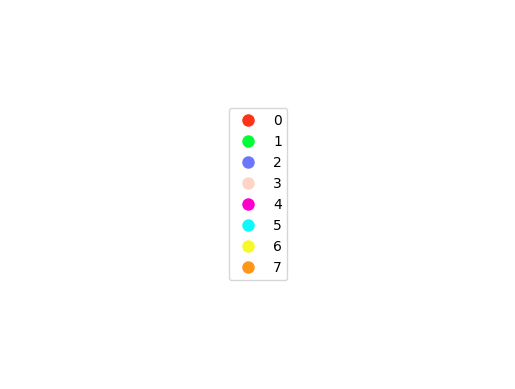

In [21]:
ct.tl.cluster_position(adata_dis500, clustering='leiden')
ct.pl.plot_cluster_communication_network(adata_dis500, uns_names=['commot_cluster-leiden-cellchat-ACTIVIN'], clustering='leiden',
    nx_node_pos='cluster', nx_pos_idx=np.array([0, 1]), nx_bg_pos=True, nx_bg_ndsize=0.25, p_value_cutoff=5e-2,
    filename='ACTIVIN_cluster_spatial.pdf', nx_node_cmap='Light24')

In [39]:
adata_dis500 = sc.read_h5ad("./adata.h5ad")
adata = sc.read_visium('/diskmnt/Projects/Users/estorrs/summer-researchers/data/HT397B1/spatial/spaceranger/HT397B1-S1H2Fs4U1Bp1/')
adata_dis500.layers['counts'] = adata.x

ValueError: Value passed for key 'counts' is of incorrect shape. Values of layers must match dimensions (0, 1) of parent. Value had shape (3561, 17943) while it should have had (3355, 32285).

In [32]:
adata_dis500.shape

(3355, 32285)

In [38]:
adata

AnnData object with n_obs × n_vars = 3561 × 17943
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [35]:
adata.X

<3561x17943 sparse matrix of type '<class 'numpy.float32'>'
	with 12484997 stored elements in Compressed Sparse Row format>

In [29]:
adata_dis500

AnnData object with n_obs × n_vars = 3355 × 32285
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'commot-cellchat-info', 'log1p', 'spatial'
    obsm: 'commot-cellchat-sum-receiver', 'commot-cellchat-sum-sender', 'spatial'
    obsp: 'commot-cellchat-ACTIVIN', 'commot-cellchat-AGT', 'commot-cellchat-ANGPT', 'commot-cellchat-Adcyap1-Adcyap1r1', 'commot-cellchat-Agt-Mas1', 'commot-cellchat-Angpt1-Tek', 'commot-cellchat-BMP', 'commot-cellchat-Bdnf-Ntrk2', 'commot-cellchat-Bmp4-Bmpr1a_Acvr2a', 'commot-cellchat-Bmp4-Bmpr1a_Bmpr2', 'commot-cellchat-Bmp4-Bmpr1b_Acvr2a', 'commot-cellchat-Bmp4-Bmpr1b_Bmpr2', 'commot-cellchat-Bmp5-Acvr1_Acvr2a', 'commot-cellchat-Bmp5-Acvr1_Bmpr2', 'commot-cellchat-Bmp5-Bmpr1a_Acvr2a', 'commot-cellchat-Bmp5-Bmpr1a_Bmpr2', 'commot-cellchat-Bmp5-Bmpr1b_Acvr2a', 'commot-cellchat-Bmp5-Bmpr1b_Bmpr2', 'commot-cellchat-Bmp6-Acvr1_Acvr2a', 'commot-cellchat-Bmp6-Acvr1_Bmpr2', 'commot-cellchat-Bmp6-Bmpr1a_Acvr2a', 'comm

In [30]:
df_deg, df_yhat = ct.tl.communication_deg_detection(adata_dis500,
    database_name = 'cellchat', pathway_name='ACTIVIN', summary = 'receiver')

KeyError: 'counts'